44. 係り受け木の可視化

与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，Graphviz等を用いるとよい．

In [2]:
from graphviz import Digraph

class Morph:
    def __init__(self, surface, base, pos, pos1):
        self.surface = surface  # 表層形
        self.base = base        # 基本形
        self.pos = pos          # 品詞
        self.pos1 = pos1        # 品詞細分類1

    def __str__(self):
        return f"surface: {self.surface}, base: {self.base}, pos: {self.pos}, pos1: {self.pos1}"

class Chunk:
    def __init__(self, morphs=None, dst=-1):
        self.morphs = morphs if morphs else []  # 形態素（Morphオブジェクト）のリスト
        self.dst = dst  # 係り先文節インデックス番号
        self.srcs = []  # 係り元文節インデックス番号のリスト

    def __str__(self):
        morphs_surface = ''.join([morph.surface for morph in self.morphs])
        return f"Chunk: {morphs_surface}, dst: {self.dst}, srcs: {self.srcs}"

    def get_text(self):
        return ''.join([morph.surface for morph in self.morphs if morph.pos != '記号'])

def parse_cabocha_output(parsed_file):
    sentences = []
    with open(parsed_file, 'r', encoding='utf-8') as f:
        chunks = {}
        chunk = None
        for line in f:
            if line == 'EOS\n':
                if chunk is not None:
                    chunks[chunk_idx] = chunk
                if chunks:
                    sorted_chunks = sorted(chunks.items())
                    sentence = [chunk for idx, chunk in sorted_chunks]
                    for idx, chunk in sorted_chunks:
                        if chunk.dst != -1:
                            sentence[chunk.dst].srcs.append(idx)
                    sentences.append(sentence)
                chunks = {}
                chunk = None
            elif line[0] == '*':
                if chunk is not None:
                    chunks[chunk_idx] = chunk
                cols = line.split(' ')
                chunk_idx = int(cols[1])
                dst = int(cols[2].rstrip('D'))
                chunk = Chunk(dst=dst)
            else:
                surface, feature = line.split('\t')
                features = feature.split(',')
                if len(features) >= 7:
                    morph = Morph(surface, features[6], features[0], features[1])
                    chunk.morphs.append(morph)
    return sentences

def visualize_dependency_tree(parsed_file, sentence_index=0):
    sentences = parse_cabocha_output(parsed_file)
    if sentence_index >= len(sentences):
        print(f"Sentence index {sentence_index} is out of range.")
        return

    sentence = sentences[sentence_index]
    dot = Digraph(format='png')

    for idx, chunk in enumerate(sentence):
        chunk_text = chunk.get_text()
        dot.node(str(idx), chunk_text)

    for idx, chunk in enumerate(sentence):
        if chunk.dst != -1:
            dot.edge(str(idx), str(chunk.dst))

    dot.render('dependency_tree', view=True)

# 指定解析結果ファイルのパス
parsed_file = 'ai.ja.txt.parsed'

# 文の係り受け木を可視化
visualize_dependency_tree(parsed_file, sentence_index=0)


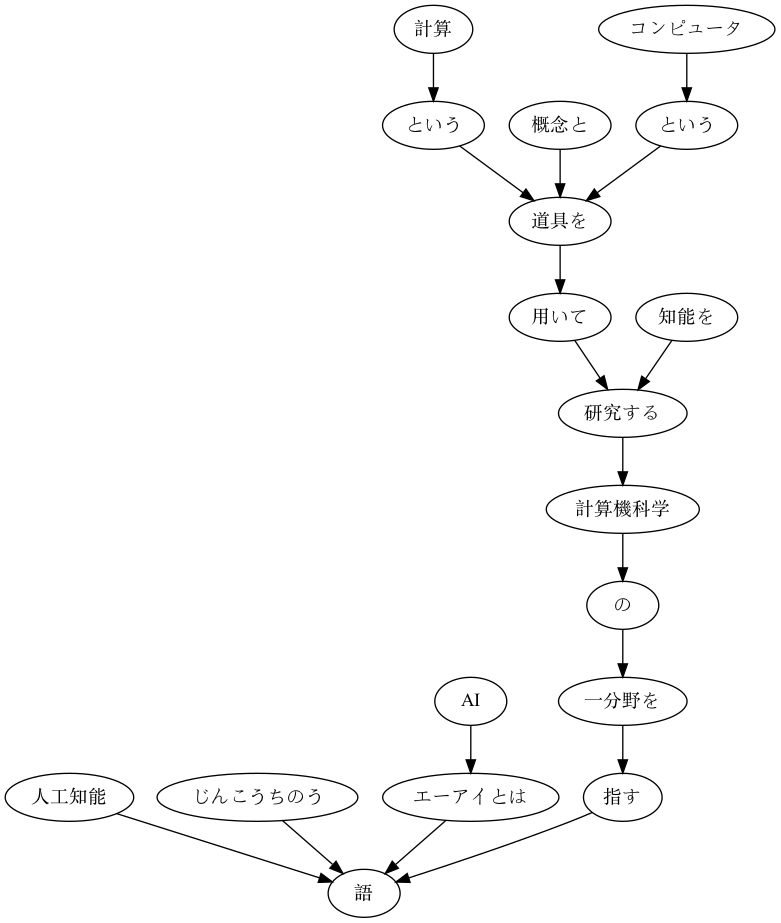

In [3]:
from IPython.display import Image, display

def display_dependency_tree_image():
    display(Image(filename='dependency_tree.png'))
display_dependency_tree_image()
